In [4]:
%run convention.ipynb

C:\Users\dell\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\dell\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


<h1 class = 'warning'>Feature scaling</h1>

# Linear SVM

<p class = 'highlight'>The <code>LinearSVC</code> class regularizes the bias term, so you should center
the training set first by subtracting its mean. This is automatic if
you scale the data using the <code>StandardScaler</code>. Moreover, make sure
you set the <code>loss</code> hyperparameter to <code>"hinge"</code>, as it is not the default
value. Finally, for better performance you should set the <code>dual</code>
hyperparameter to False, unless there are more features than
training instances (we will discuss duality later in the chapter).
</p>

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 42)
pipe = make_pipeline(StandardScaler(), LinearSVC(max_iter = 10000, loss = 'hinge'))
params = {'linearsvc__C' : [.0001, .001, .01, .1, 1, 10, 100, 1000]}
grid = GridSearchCV(pipe, params, cv = 5)
grid.fit(X_train, y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('linearsvc',
                                        LinearSVC(C=1.0, class_weight=None,
                                                  dual=True, fit_intercept=True,
                                                  intercept_scaling=1,
                                                  loss='hinge', max_iter=10000,
                                                  multi_class='ovr',
                                                  penalty='l2',
                                                  random_state=None, tol=0.0001,
                                                  verbose=0))

In [11]:
grid.best_score_

0.9285714285714286

In [12]:
grid.best_params_

{'linearsvc__C': 10}

Alternatively, you could use the SVC class, using <code>SVC(kernel="linear", C=1)</code>, but it
is much slower, especially with large training sets, so it is not recommended. <span class = 'tag'>NOTE</span>

<p class = 'note'>When <code>C</code> is small, the street is wider</p>

<p class = 'highlight'>With so many kernels to choose from, how can you decide which
one to use? As a rule of thumb, you should always try the linear
    kernel first (remember that <code>LinearSVC</code> is much faster than <code>SVC(kernel="linear")</code>), especially if the training set is very large or if it
has plenty of features. If the training set is not too large, you should
try the Gaussian RBF kernel as well; it works well in most cases.
Then if you have spare time and computing power, you can also
experiment with a few other kernels using cross-validation and grid
search, especially if there are kernels specialized for your training
set’s data structure.
</p>

# Computational Complexity

<ul>
    <li><code>LinearSVC</code>: $O(m * n)$</li>
    <li><code>SVC</code>: $O(m^2 * n)$ to $O(m ^ 3 * n)$ <span class = 'tag'>large dataset -> slow</span></li>
</ul>

<table>
<thead><td>Class</td><td>Time complexity</td> <td>Out-of-core support</td> <td>LScaling</td><td> required Kernel trick</td></thead>
 
<tr><td>LinearSVC</td><td> O(m × n)</td><td> No</td><td> Yes</td><td> No</td></tr>
<tr><td>SGDClassifier</td><td> O(m × n)</td><td> Yes</td><td> Yes</td><td> No</td></tr>
<tr><td>SVC</td><td> O(m² × n) to O(m³ × n)</td> <td>No</td><td> Yes</td><td> Yes</td></tr>
</table>

# SVM Regression

As we mentioned earlier, the SVM algorithm is quite versatile: not only does it sup‐
port linear and nonlinear classification, but it also supports linear and nonlinear
regression. The trick is to reverse the objective: instead of trying to fit the largest pos‐
sible street between two classes while limiting margin violations, SVM Regression
tries to fit as many instances as possible on the street while limiting margin violations
(i.e., instances o the street). The width of the street is controlled by a hyperparame‐
ter ϵ. Figure 5-10 shows two linear SVM Regression models trained on some random
linear data, one with a large margin (ϵ = 1.5) and the other with a small margin (ϵ =
0.5).

<img src = '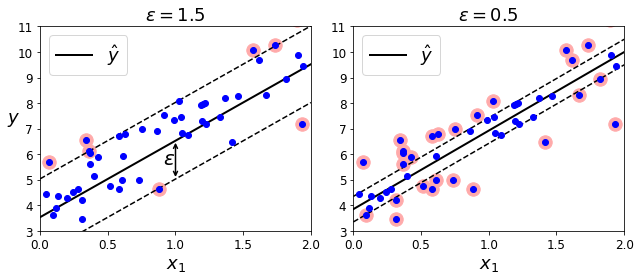%0A'>

Adding more training instances within the margin does not affect the model’s predic‐
tions; thus, the model is said to be <i>ϵ-insensitive</i>

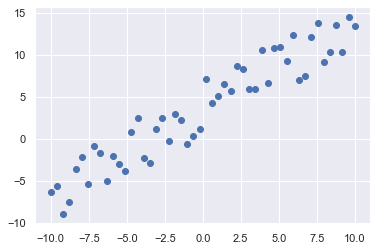

In [12]:
from sklearn.svm import LinearSVR, SVR
np.random.seed(101)
N = 50
X = np.linspace(-10, 10, N)
y = X + 7 * np.random.rand(N)
plt.scatter(X, y)

In [31]:
eps = 1
model = LinearSVR(epsilon=eps)
model.fit(X[:,None], y)

LinearSVR(C=1.0, dual=True, epsilon=1, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

1

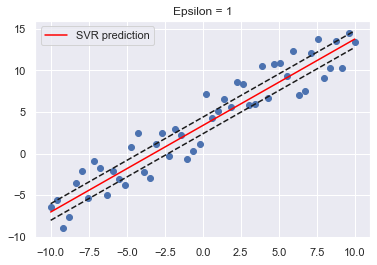

In [36]:
plt.scatter(X, y)
y_pred = model.predict(X[:, None])
plt.plot(X, y_pred, color = 'red', label = 'SVR prediction')
plt.plot(X, y_pred + eps, ls = '--', color = 'k')
plt.plot(X, y_pred - eps, ls = '--', color = 'k')
plt.legend()
plt.title('Epsilon = {}'.format(eps))
model.epsilon

## Kernel SVR

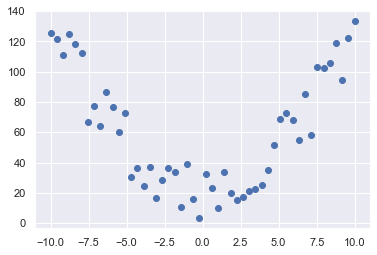

In [38]:
y = X * X + 50 * np.random.rand(N)
plt.scatter(X, y)

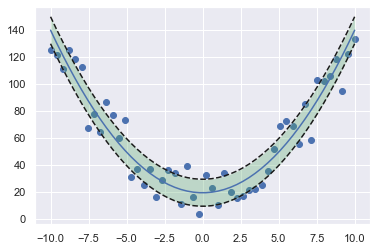

In [54]:
eps = 10
model = SVR(epsilon=eps, kernel = 'poly', degree = 2, gamma = 1)
model.fit(X[:,None], y)

y_pred = model.predict(X[:,None])
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.plot(X, y_pred + eps, ls = '--', color = 'k')
plt.plot(X, y_pred - eps, ls = '--', color = 'k' )
plt.fill_between(X, y_pred - eps, y_pred + eps, fc = 'g', alpha = .3)

<b>Question:</b>Should you use the primal or the dual form of the SVM problem to train a model
on a training set with millions of instances and hundreds of features?
<hr>
<b>Answer:</b>
This question applies only to linear SVMs since kernelized can only use the dual
form. The computational complexity of the primal form of the SVM problem is
proportional to the number of training instances m, while the computational
complexity of the dual form is proportional to a number between $m^2$
 and $m^3$
. So
if there are millions of instances, you should  definitely use the primal form,
because the dual form will be much too slow